## CNN classifier for the MNIST dataset

In [22]:
#### PACKAGE IMPORTS ####


import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




![MNIST overview image](mnist.png)

#### The MNIST dataset

In this Project, we will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.



#### Load and preprocess the data

In [23]:

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [24]:

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    """
    train_images=train_images/255
    test_images=test_images/255
    return train_images,test_images

In [25]:

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [26]:
# Adding a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Building the convolutional neural network model

In [27]:


def get_model(input_shape):
    """
    This function builds a Sequential model.
    """
    model = tf.keras.models.Sequential ([
        tf.keras.layers.Conv2D(8,3,padding='SAME',activation='relu',input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ])
    return model
    

In [28]:

model = get_model(scaled_train_images[0].shape)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
________________________________________________

#### Compiling the model



In [31]:


def compile_model(model):

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    

In [32]:

compile_model(model)

#### Fitting the model to the training data



In [33]:


def train_model(model, scaled_train_images, train_labels):
    """
    This function trains the model for 5 epochs on the scaled_train_images and train_labels. 
    """
    history=model.fit(scaled_train_images,train_labels,epochs=5)
    return history
    

In [34]:

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2216 - accuracy: 0.9338
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0748 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0525 - accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0400 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0310 - accuracy: 0.9899


#### Plotting the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss


In [36]:

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

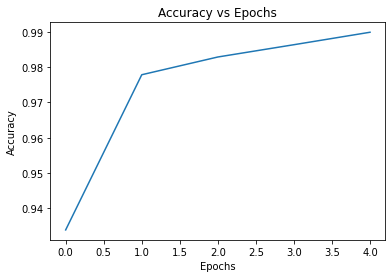

In [37]:

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

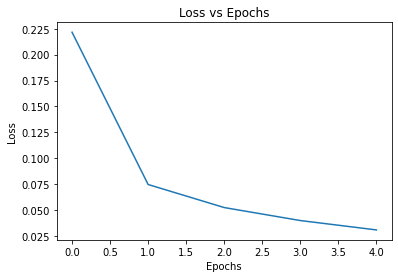

In [38]:

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluating the model



In [40]:


def evaluate_model(model, scaled_test_images, test_labels):

    loss, acc=model.evaluate(scaled_test_images,test_labels,verbose=0)
    return (loss,acc)
    

In [41]:

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.0447692945599556
Test accuracy: 0.9853000044822693


#### Model predictions


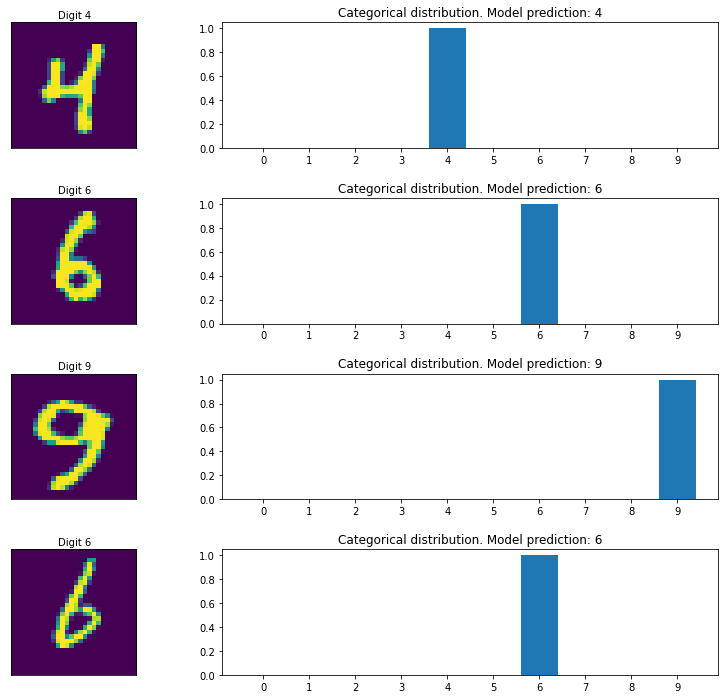

In [43]:

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()